# UNN Machine Learning

## Lab

Этот набор данных для Pokemon-ов, который включает в себя:

Name: Название каждого покемона

Type 1: у каждого покемона есть тип, который определяет бессилие / сопротивление атакам

Type 2: некоторые покемоны имеют двойной тип

базовую статистику:

a) Total: сумма всех статистических данных, которые появляются после этого, общее руководство о том, насколько сильным является покемон

b) HP: очки здоровья или здоровье, определяет, сколько урона может покемон преодолеть до обморока

c) Attack: базовый модификатор для обычных атак (например, Scratch, Punch)

d) Defense: сопротивление базовому урону от обычных атак

e) SP Atk: специальная атака, базовый модификатор для специальных атак (например, огонь, пузырь)

f) SP Def: сопротивление базового урона от специальных атак

g) Speed: скорость атаки

так же для кажого покемона указано:

a) поколение (generation)

b) легендарность (legendary)

In [492]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import csv as cs
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

## Data loading

In [493]:
data = pd.read_csv('pokemon.csv', sep = ',', engine = 'python')
type(data)

pandas.core.frame.DataFrame

In [494]:
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## Data analysis

In [495]:
print(data.shape)

(800, 12)


In [496]:
cols = list(data.columns.values)
print(cols)

['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


In [497]:
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [498]:
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Корреляция признаков

In [500]:
data.corr()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp_Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp_Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Зависимость скорости атаки от типа покемона:

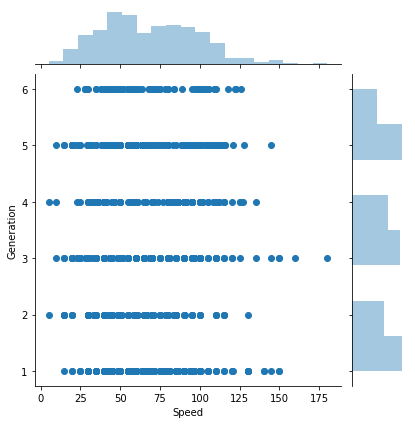

In [501]:
sbn.jointplot(x="Speed", y="Generation", data=data)

Зависимость между скоростью покемона и поколением отсутствует.

Зависимость сопротивления против специальних атак от сопротивления:

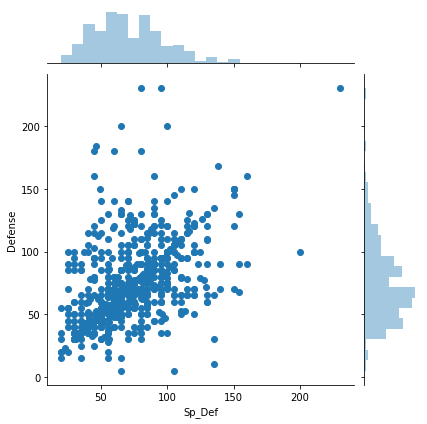

In [502]:
sbn.jointplot(x="Sp_Def", y="Defense", data=data)

Количество покемонов в каждом типе

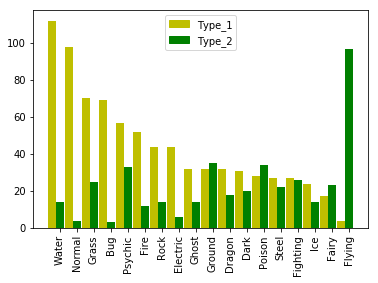

In [503]:
vals1 = [data['Type_1'].value_counts()[key] for key in data['Type_1'].value_counts().index]
vals2 = [data['Type_2'].value_counts()[key] for key in data['Type_1'].value_counts().index]
inds = np.arange(len(data['Type_1'].value_counts().index))
width = .45
handles = [ptc.Patch(color='y', label='Type_1'), ptc.Patch(color='g', label='Type_2')]
plt.bar(inds, vals1, width, color='y')
plt.bar(inds+width, vals2, width, color='g')
plt.gca().set_xticklabels(data['Type_1'].value_counts().index)
plt.gca().set_xticks(inds+width)
plt.xticks(rotation=90)
plt.legend(handles=handles)
pass

Total для легендарных покемонов по отдельным типам:

## Задача: Определить легендарность по характеристикам

Подготовка данный для ML алгоритнов бибилиотеки Scikit-learn

In [504]:
data.count(axis=0)

Name          800
Type_1        800
Type_2        414
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64

Только лишь у половины покемонов заполен признак Type_2

In [505]:
data[data.Type_2.isnull()].head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


In [506]:
data['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [507]:
data['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Type_2 является категориальным признаком, есть два варианта, как поступить с незаполнеными значениями: заполнение пропущенных значений самым популярным в столбце или удалить этот столбец.

In [508]:
data['Type_2'].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type_2, dtype: object

Самый частый встречающийся Type_2 - это "Летающий", однако добавление признака было бы неправильным подходом в данном случаем. Удаляем признак для всего датасета.

In [509]:
data = data.drop('Type_2', axis=1)

А так же уберем имена покемонов и сумму всех статистических данных:

In [510]:
data = data.drop('Name', axis=1)
data = data.drop('Total', axis=1)

In [511]:
data.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Категориальные и числовые признаки

In [512]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary']


#### Небинарные признаки

Векторизуем

In [513]:
data_nonbinary = data['Type_1'].astype('category').cat.codes
y = np.array([1 if it == True else 0 for it in data['Legendary']])
data = data.drop('Legendary', axis=1)

In [514]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['Type_1']
['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation']


#### Нормализация количественных признаков

In [515]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [516]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00


In [517]:
data = data_numerical
data['Type'] = data_nonbinary
print(data.shape)
print (data.columns)

(800, 8)
Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [518]:
data.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Type
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,9.467500
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.580356
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,0.000000
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,5.000000
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,10.000000
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,14.000000
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,17.000000


In [519]:
Z = data
names = Z.columns
print(names)

Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'Type'],
      dtype='object')


In [520]:
print(Z.shape)
N, d = Z.shape

(800, 8)


#### Обучающая и тестовая выборки

In [521]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

560 240


In [522]:
tt_errors = pd.DataFrame(columns=['model', 'train_errors', 'test_errors'])

## KNN - nearest neighbors algorithm

In [523]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [524]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.06607142857142857
Error test: 0.09166666666666666


#### Побор параметров

In [525]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.044642857142857095 1


#### Start kNN

In [526]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.09583333333333334


# Homework 2

In [527]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreducedTrain = pca.fit_transform(X_train)
XPCAreducedTest = pca.fit_transform(X_test)

print('Sklearn reduced X_train: \n', XPCAreducedTrain)
print('Sklearn reduced X_test: \n', XPCAreducedTest)

Sklearn reduced X_train: 
 [[ 6.45494148 -1.5926148 ]
 [-7.53700497  0.30479297]
 [ 9.424273   -3.22618846]
 ...
 [ 4.42802797 -1.80220159]
 [-2.54487314  0.91643213]
 [-3.54049428 -2.28550081]]
Sklearn reduced X_test: 
 [[ 3.3647161   2.76411702]
 [ 0.41768718  0.95615607]
 [-2.47434459 -3.07029333]
 [ 3.47527459 -0.57989627]
 [-7.57902827  0.39859126]
 [ 6.51792294 -1.55246713]
 [-6.66312236  3.20829426]
 [-4.66746195  1.97655667]
 [ 3.4231411   0.84464729]
 [-7.54556003  0.48175963]
 [ 4.52187999 -2.98986444]
 [ 0.38492196  1.04718869]
 [ 9.502056   -2.91132425]
 [-7.57391032  1.52291551]
 [ 2.40576672  2.2007513 ]
 [ 0.38649714  1.10423175]
 [ 3.42095476  1.52851808]
 [-2.478619   -2.08841145]
 [-6.73081673  1.72201799]
 [-7.48997424 -2.18571508]
 [-7.47201866 -2.43947316]
 [-4.63750146  1.84170606]
 [ 6.45909612 -0.16999787]
 [ 3.428506    0.84590346]
 [-0.60705643  2.37899264]
 [-3.5655998   0.04149735]
 [-4.51827554 -1.2817527 ]
 [-7.58722754  0.5551746 ]
 [ 0.42123882  1.668600

#### Построим точки на плоскости

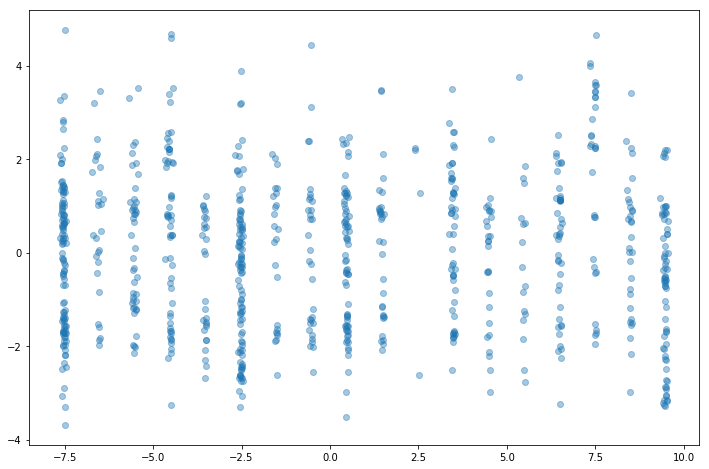

In [558]:
concatData = np.vstack((XPCAreducedTrain,XPCAreducedTest))
plt.figure(figsize = (12,8))
plt.scatter(concatData[:,0], concatData[:,1], alpha = 0.4 )
plt.show()

#### Start KNN for reduced data

In [530]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(XPCAreducedTrain, y_train)

err_train = np.mean(y_train != knn.predict(XPCAreducedTrain))
err_test  = np.mean(y_test  != knn.predict(XPCAreducedTest))

print(err_train, err_test)

0.0 0.1125


In [536]:
from sklearn.decomposition import PCA
errors = [
for i in range(1,9):
    pca = PCA(n_components = i)
    XPCAreducedTrain = pca.fit_transform(X_train)
    XPCAreducedTest = pca.fit_transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(XPCAreducedTrain, y_train)
    err_train = np.mean(y_train != knn.predict(XPCAreducedTrain))
    err_test  = np.mean(y_test  != knn.predict(XPCAreducedTest))
    
    errors.append([err_train, err_test])

print(errors)

[[0.0, 0.18333333333333332], [0.0, 0.1125], [0.0, 0.10833333333333334], [0.0, 0.09583333333333334], [0.0, 0.0875], [0.0, 0.09583333333333334], [0.0, 0.1], [0.0, 0.1]]


График зависимости ошибки от количества используемых компонент

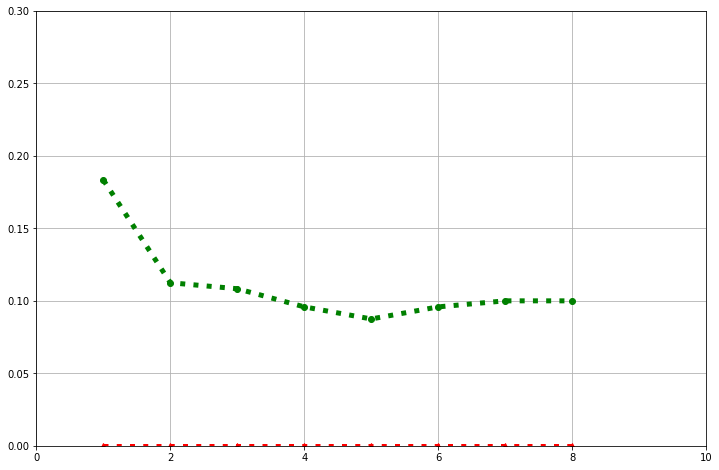

In [556]:
i_range = range(1,9)
arr_errors = np.array(errors)
y_train = arr_errors[:,0]
y_test = arr_errors[:,1]
plt.figure(figsize = (12,8))
line_train, line_test = plt.plot(i_range, y_train, 'r^:', i_range, y_test, 'go:', lw = 5)

plt.axis([0.0, 10.0, 0.0, 0.3])
plt.grid()
plt.show()

PCA позволяет снизить ошибку в случае уменьшения размерности с 8 до 5 компонент.
При последующем уменьшее ошибка растет.


Данные могут с хорошей точностью следовать какой-нибудь кривой, а эта кривая может быть сложно расположена в пространстве данных. В этом случае метод главных компонент для приемлемой точности потребует нескольких компонент